### Load tensorflow

In [2]:
import tensorflow as tf
tf.random.set_seed(42)

In [3]:
tf.__version__

'2.9.1'

### Collect Data
We will use MNIST dataset for this exercise. This dataset contains images of hand written numbers with each image being a black & white picture of size 28x28. We will download the data using tensorflow API. The dataset has 60,000 training examples and 10,000 test examples. Please note that images have already been converted to numpy arrays.

In [4]:
#Download dataset
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

In [5]:
#Check number of training examples and size of each example
trainX.shape

(60000, 28, 28)

In [6]:
#Check number of test examples and size of each example
testX.shape

(10000, 28, 28)

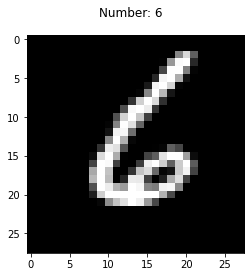

In [7]:
#Let's review the data
import matplotlib.pyplot as plt
import numpy as np
img_num = np.random.randint(0, testX.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(testX[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(testY[img_num]))
plt.show()

### Convert Output label to multiple values

In [8]:
#Check current label size
testY[0]

7

In [9]:
#Convert labels to one hot encoding
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [10]:
#Now check the label size
trainY[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Build the Graph

In [11]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

### Apply Convolutional Layers, MaxPooling

In [12]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

In [13]:
#Check model output at current stage
model.output

<KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'batch_normalization_2')>

### Add layers for Classification

In [14]:
#Add layer with 10 filters
model.add(tf.keras.layers.Conv2D(10, kernel_size=(1,1), activation='relu'))

In [15]:
#Check model output at current stage
model.output

<KerasTensor: shape=(None, 13, 13, 10) dtype=float32 (created by layer 'conv2d_2')>

In [16]:
#Use Global Average pooling layer to reduce number of outputs to 10
model.add(tf.keras.layers.GlobalAveragePooling2D())

In [17]:
#Check model output at current stage
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'global_average_pooling2d')>

In [18]:
#Output layer
model.add(tf.keras.layers.Activation('softmax'))

In [19]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 13, 13, 64)       2

## Train the model

In [21]:
#Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 97s 51ms/step - loss: 1.1401 - accuracy: 0.6956 - val_loss: 0.6020 - val_accuracy: 0.8082
Epoch 2/30
1875/1875 [==============================] - 96s 51ms/step - loss: 0.3448 - accuracy: 0.9196 - val_loss: 0.2917 - val_accuracy: 0.9212
Epoch 3/30
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2310 - accuracy: 0.9406 - val_loss: 0.1897 - val_accuracy: 0.9484
Epoch 4/30
1875/1875 [==============================] - 98s 52ms/step - loss: 0.1897 - accuracy: 0.9489 - val_loss: 0.1644 - val_accuracy: 0.9533
Epoch 5/30
1875/1875 [==============================] - 98s 52ms/step - loss: 0.1665 - accuracy: 0.9540 - val_loss: 0.1861 - val_accuracy: 0.9498
Epoch 6/30
1875/1875 [==============================] - 104s 55ms/step - loss: 0.1493 - accuracy: 0.9578 - val_loss: 0.1547 - val_accuracy: 0.9565
Epoch 7/30
1875/1875 [==============================] - 98s 52ms/step - loss: 0.1364 - accuracy: 0.9613 - val_loss: 0.1919

In [ ]:
model.save('mnist_cnn_v1.h5')

In [ ]:
!ls -l